# init

## imports

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
import warnings

from tabulate import tabulate

warnings.filterwarnings('ignore')

## configs

In [2]:
PREDICTION_DATA_PATH = ('/home/shaghayegh/class/ad_click/data/test.csv')

# load data

In [3]:
pred_df = pd.read_csv(PREDICTION_DATA_PATH)
pred_df

,adgroup_id,userid,time_stamp,pid,nonclk,clk,cms_segid,cms_group_id,pvalue_level,shopping_level,...,cate_clk_count,cat_gender_ad_count,cat_gender_ad_clk_count,cat_age_ad_count,cat_age_ad_clk_count,gender_age_ad_count,gender_age_ad_clk_count,Pred_xg1,Pred_xg2,Pred_xg3
0,102,1122493,1494544665,430539_1007,1,0,0,10,NaN,3,...,120.0,437,17.0,972,49.0,31,1.0,0.425842,0.425445,0.361358
1,102,1030522,1494561308,430539_1007,1,0,82,10,3.0,3,...,128.0,452,18.0,1031,53.0,32,1.0,0.413324,0.557408,0.347493
2,102,686384,1494575099,430539_1007,1,0,0,10,NaN,3,...,132.0,464,18.0,1067,53.0,33,1.0,0.395283,0.429266,0.356536
3,102,769032,1494577595,430548_1007,1,0,80,10,2.0,3,...,134.0,466,18.0,1077,54.0,34,1.0,0.395283,0.314430,0.282013
4,102,83112,1494579892,430539_1007,1,0,80,10,2.0,3,...,134.0,469,18.0,1086,54.0,35,1.0,0.395283,0.471036,0.398434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7753750,846620,618896,1494673481,430548_1007,1,0,0,4,NaN,2,...,12920.0,231953,11284.0,58874,2890.0,23,2.0,0.501496,0.433991,0.402419
7753751,846620,812936,1494684147,430539_1007,1,0,33,4,2.0,3,...,13187.0,236803,11519.0,60119,2944.0,24,2.0,0.501496,0.464703,0.463746
7753752,846643,24187,1494487104,430548_1007,1,0,92,11,2.0,3,...,174.0,3044,158.0,1050,65.0,11,0.0,0.475533,0.501097,0.464452
7753753,846643,873656,1494566205,430548_1007,1,0,0,11,NaN,3,...,195.0,3400,175.0,1201,73.0,12,0.0,0.478228,0.529030,0.530012


# evaluation

## methods

In [9]:
results_dict = {}
auc_scores = {}
table_data = []

### auc curve

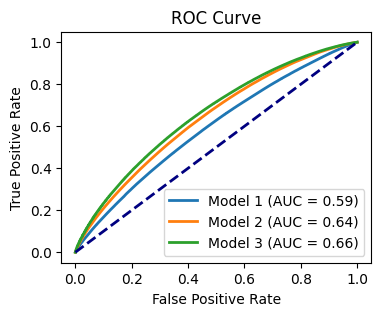

In [10]:
true_labels = pred_df['clk']
xgs = 4

plt.figure(figsize=(4, 3))  # Adjust the figure size if needed

for xg in range(1, xgs):
    key = f'predicted_probabilities_{xg}'
    results_dict[key] = pred_df[f'Pred_xg{xg}']
    auc_score = roc_auc_score(true_labels, results_dict[key])
    auc_scores[xg] = auc_score
    table_data.append([f'Model {xg}', auc_score])
    fpr, tpr, _ = roc_curve(true_labels, results_dict[key])
    plt.plot(fpr, tpr, lw=2, label=f'Model {xg} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## summerize

In [11]:
print(tabulate(table_data, headers=['Model', 'AUC Score'], tablefmt='grid'))

+---------+-------------+
| Model   |   AUC Score |
+=========+=============+
| Model 1 |    0.590489 |
+---------+-------------+
| Model 2 |    0.637217 |
+---------+-------------+
| Model 3 |    0.656162 |
+---------+-------------+
